# Inversión de los *Boreholes* en Australia

## 01 - Lectura de Datos
Lectura de los datos en los archivos de los *boreholes* en Australia. Se extraerá información importante, como la latitud, longitud, profundidad,...etc de cada uno de los pozos. Finalmente se realizará un gráfico de la localización de los *boreholes* y de sus profundidades.

### Obtener los Datos

In [30]:
# Importar las librerías necesarias

# Librerías necesarias para obtener los datos
import os
import numpy as np
import pandas as pd
import re
import math

# Librerías para la visulización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
#os.environ['PROJ_LIB'] = '/Users/mb/anaconda3/envs/worklab/share/proj'
import warnings
warnings.filterwarnings("ignore")

# Elijo el estilo de las gráficas.
sns.set_theme(style="whitegrid")

In [31]:
path = "../boreholes/raw/"


In [32]:
# Leo todos los documentos y extraigo información sobre su nombre y profundidad.

nombre = []
depth =[]

for filename in os.listdir(path):
    with open(os.path.join(path,filename), 'r',encoding="latin1") as f:
        
        # Creo una lista con los nombres de los boreholes
        filename = re.split("-|.txt",filename)
        del filename[-1]
        nombre.append(filename[-2]+"_"+filename[-1])
        
        #Creo una lista con la maxima profundidad de cada borehole
        text = f.readlines()[-1]
        text =text.split()
        text = np.asfarray(text)
        depth.append(text[0]) 

In [33]:
# Obtengo una lista de en qué posición tendría mi primer dato.
suma = 0
files = 0
posicion = []
for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r',encoding="latin1") as f:
        files += 1
        lineas = [lineas.strip("\n") for lineas in f.readlines()]
        
        num_linea = 0
        for i in lineas:
            if ("DEPTH_M" in i.upper()):
                suma += 1
                posicion.append(num_linea)
            num_linea += 1

#Ya que se nombra dos veces en el documento "Depth_m" y solo nos interesa el segundo
posicion = posicion[1::2]
 

In [34]:
# Obtengo ese primer dato.

num_file = 0
prim = []

for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r',encoding="latin1") as f:    
        lineas = [lineas.strip("\n") for lineas in f.readlines()]
        primer = lineas[posicion[num_file]+1].split()
        prim.append(float(primer[0]))
    num_file += 1

In [35]:
# Obtener otros parámetros importantes.
date = []
lat = []
lon = []
To = []
gradient = []
conductivity = []
numero_datos = []

for filename in os.listdir(path):
    with open(os.path.join(path,filename),"r",encoding="latin1") as f:
        for i in f.readlines():
            if("Northernmost_Latitude") in i:
                lat.append(float(i.split()[-1]))
            if ("Easternmost_Longitude") in i:
                lon.append(float(i.split()[-1]))
            if("Date of measurement") in i:
                date.append(math.floor(float(i.split()[-1])))
            if("Date of logging") in i:
                date.append(math.floor(float(i.split()[-1])))                
            if ("Estimated mean conductivity") in i :
                conductivity.append(float(i.split()[-1]))
            if ("Thermal Conductivity") in i :
                conductivity.append(float(i.split()[-1]))                
            if ("Estimated mean thermal gradient") in i:
                gradient.append(float(i.split()[-1]))            
            if ("Geothermal Gradient") in i:
                gradient.append(float(i.split()[-1]))

In [36]:
# Crear el pandas dataframe con los datos interesantes.
df = pd.DataFrame(list(zip(date,lat,lon,prim,posicion,depth,conductivity,gradient)),columns=["Fecha","Latitud(S)","Longitud(W)","Primer Dato(m)","Posición del Primer Dato","Profundidad(m)","Conductividad Térmica(W/m/K)","Gradiente Geotérmico (K/km)"],index = nombre)


In [37]:
# Añado el path del archivo de cada borehole al dataframe.
document_name = []
for filename in os.listdir(path):
    document_name.append(os.path.join(path, filename))
df["Path"]=document_name

In [38]:
df.head()

,Fecha,Latitud(S),Longitud(W),Primer Dato(m),Posición del Primer Dato,Profundidad(m),Conductividad Térmica(W/m/K),Gradiente Geotérmico (K/km),Path
AU_1,1969,-20.53,139.48,53.34,126,228.60,3.7599,16.270,../boreholes/raw/huang-2013-AU-1.txt
AU_10,1972,-34.00,151.25,22.86,126,449.58,2.7215,28.159,../boreholes/raw/huang-2013-AU-10.txt
AU_11,1972,-32.55,138.48,100.06,108,376.03,5.4000,17.390,../boreholes/raw/huang2016-AU-11.txt
AU_12,1969,-20.55,139.48,53.34,108,297.18,3.8300,19.090,../boreholes/raw/huang2016-AU-12.txt
AU_13,1971,-31.45,145.48,103.63,108,297.49,4.4400,23.520,../boreholes/raw/huang2016-AU-13.txt


In [39]:
df.to_csv("../boreholes/dataframe.csv")

### Gráfica

Text(0.5, 1.0, 'Posición de los boreholes en Australia y sus profundidades.')

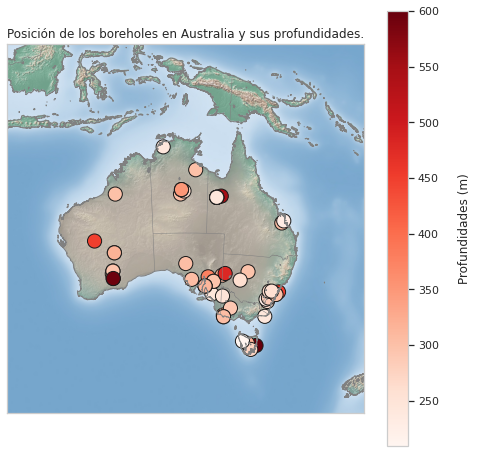

In [40]:
# Gráfica de la posición de cada borehole y su profundidad.

lat = df["Latitud(S)"].values
lon = df["Longitud(W)"].values
depth = df["Profundidad(m)"].values

fig = plt.figure(figsize=(8,8))
m = Basemap(projection="lcc",resolution="h",lat_0= -25.3,lon_0=134.5,width = 6.0E6,height = 6.2E6)
m.shadedrelief()
m.drawcoastlines(color ="gray")
m.drawcountries(color="gray")
m.drawstates(color="gray")

m.scatter(lon,lat,latlon=True,c = depth ,cmap = "Reds",marker="o",edgecolor="k",s=200)
bar=plt.colorbar()
bar.set_label("\nProfundidades (m)")
plt.title("Posición de los boreholes en Australia y sus profundidades.")